<img 
     src="https://github.com/Kesterchia/Global-animal-diseases/blob/main/Data/kruger_wildlife__banner.jpg?raw=true" 
     alt="Drawing" 
     style="width: 600px;"/>

## About the dataset:

## Context
This dataset is downloaded from the EMPRES Global Animal Disease Information System.
The Empress-i system is run by the Food and Agriculture Organisation of the United Nations. Its Disease Outbreak Module provides updated information on global animal disease distribution and current threats at national, regional and global level on priority animal diseases. Disease data, such as information on suspicions and confirmation of outbreaks in livestock and wildlife species, laboratory results or follow-up reports on an outbreak situation, can be stored in a standardized format and are presented through a user-friendly and customizable interface. 

The dataset can be downloaded from: https://www.kaggle.com/tentotheminus9/empres-global-animal-disease-surveillance

## Content
The dataset shows the when, where and what of animal disease outbreaks from 2016 to 2017, including African swine fever, Foot and mouth disease and Bird-flu. Numbers of cases, deaths, etc are also included.




# Part 1: Getting a brief overview of the data

In [19]:
# Import modules 

import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline

In [20]:
#Read in disease data as df

df = pd.read_csv("https://github.com/Kesterchia/Global-animal-diseases/blob/main/Data/Outbreak_240817.csv?raw=True")

In [21]:
df.head(15)

Id source   latitude  longitude  region             country  \
0   230399    OIE -27.900000  30.800000  Africa        South Africa   
1   230381    OIE  54.837037  73.354155  Europe  Russian Federation   
2   230333    OIE -21.077740  30.211620  Africa            Zimbabwe   
3   230396    OIE -26.000000  28.300000  Africa        South Africa   
4   230371    OIE  49.237900  17.700200  Europe      Czech Republic   
5   230370    OIE  49.237300  17.700800  Europe      Czech Republic   
6   230395    OIE -26.000000  28.300000  Africa        South Africa   
7   230367    OIE  47.771608  33.993286  Europe             Ukraine   
8   230379    OIE  56.538381  16.119304  Europe              Sweden   
9   230394    OIE -24.600000  27.200000  Africa        South Africa   
10  230380    OIE  55.456034  72.762834  Europe  Russian Federation   
11  230378    OIE  52.084460  23.080818  Europe              Poland   
12  230377    OIE  53.644444  22.605556  Europe              Poland   
13  230397    OIE -26.800000  29.800000  Africa        South Africa   
14  230369    OIE  49.237300  17.699900  Europe      Czech Republic   

              admin1        localityName localityQuality observationDate  ...  \
0      KwaZulu-Natal  HPAI_H5N8_2017_019           Exact      17/08/2017  ...   
1     Omskaya Oblast      Novaya Stanica           Exact      16/08/2017  ...   
2           Masvingo              Mwambe           Exact      16/08/2017  ...   
3            Gauteng  HPAI_H5N8_2017_020           Exact      15/08/2017  ...   
4       Jihomoravsky             Hvozdná           Exact      15/08/2017  ...   
5       Jihomoravsky             Ostrata           Exact      15/08/2017  ...   
6            Gauteng  HPAI_H5N8_2017_021           Exact      14/08/2017  ...   
7   Dnipropetrovs'ka           Slovyanka           Exact      14/08/2017  ...   
8        Kalmar Laen              Kalmar           Exact      13/08/2017  ...   
9            Limpopo  HPAI_H5N8_2017_022           Exact      12/08/2017  ...   
10    Omskaya Oblast         Tavrichanka           Exact      12/08/2017  ...   
11         Lubeiskie            Terebela           Exact      12/08/2017  ...   
12         Podlaskie        Pienczykowek           Exact      12/08/2017  ...   
13        Mpumalanga  HPAI_H5N8_2017_018           Exact      11/08/2017  ...   
14      Jihomoravsky             Hvozdná           Exact      11/08/2017  ...   

            speciesDescription sumAtRisk sumCases sumDeaths sumDestroyed  \
0   domestic, unspecified bird  248000.0     12.0      12.0      50000.0   
1              domestic, swine     122.0      6.0       1.0          0.0   
2             domestic, cattle    1283.0    112.0       0.0          NaN   
3       wild, unspecified bird       NaN      1.0       1.0          0.0   
4              wild, wild boar       NaN      1.0       1.0          NaN   
5              wild, wild boar       NaN      1.0       1.0          NaN   
6              domestic, goose      34.0     19.0      19.0          0.0   
7              domestic, swine       2.0      2.0       2.0          0.0   
8            domestic, chicken    4000.0   1600.0       0.0       4000.0   
9   domestic, unspecified bird      62.0      5.0       5.0          0.0   
10             domestic, swine       8.0      1.0       1.0          7.0   
11             domestic, swine      25.0      4.0       1.0         24.0   
12             domestic, swine      19.0      5.0       5.0         14.0   
13  domestic, unspecified bird     266.0     81.0      81.0        135.0   
14             wild, wild boar       NaN      1.0       1.0          NaN   

    sumSlaughtered  humansGenderDesc  humansAge  humansAffected  humansDeaths  
0              0.0               NaN        0.0             NaN           NaN  
1              0.0               NaN        NaN             NaN           NaN  
2              7.0               NaN        NaN             NaN           NaN  
3              0.0               NaN 

In [22]:
# Quickly seeing some information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17008 entries, 0 to 17007
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  17008 non-null  int64  
 1   source              17008 non-null  object 
 2   latitude            17008 non-null  float64
 3   longitude           17008 non-null  float64
 4   region              17008 non-null  object 
 5   country             17008 non-null  object 
 6   admin1              17008 non-null  object 
 7   localityName        17008 non-null  object 
 8   localityQuality     17008 non-null  object 
 9   observationDate     16506 non-null  object 
 10  reportingDate       17008 non-null  object 
 11  status              17008 non-null  object 
 12  disease             17008 non-null  object 
 13  serotypes           10067 non-null  object 
 14  speciesDescription  15360 non-null  object 
 15  sumAtRisk           9757 non-null   float64
 16  sumC

In [23]:
#Generating profile report for df

pandas_profiling.ProfileReport(df)

## Observations:


Human-related variables like deaths, age and affected individuals have over 90% of values missing. This could be due to difficulty getting information on whether diseases have affected the human population

The data seems clean in other columns with geographical data and disease types.





# Part 2: Doing some EDA to find information from the dataset

## Looking at the most common diseases:

In [24]:
#Find top 5 most common diseases
top5_diseases = df[['disease']].groupby(df['disease']).count().nlargest(7,'disease')
top5_diseases

disease
disease                        
Influenza - Avian          6479
Bluetongue                 3391
African swine fever        3330
Lumpy skin disease         2112
MERS-CoV                    675
Foot and mouth disease      303
Newcastle disease           185

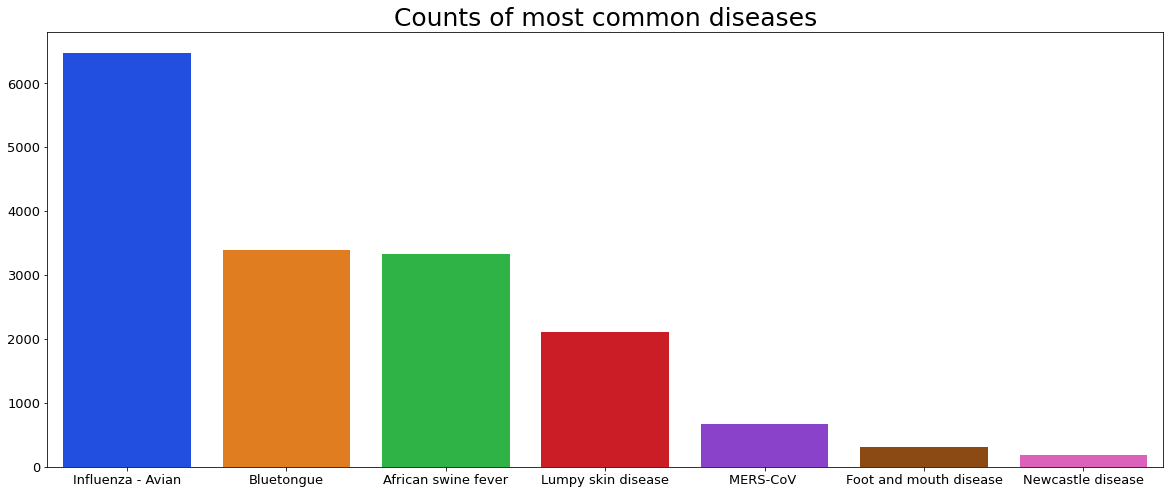

In [25]:
#Plot the counts of diseases

fig = plt.figure(figsize = (20,8))

disease_plot = sns.countplot(df[df['disease'].isin(list(top5_diseases.index))]['disease'],
                             palette = 'bright',
                             order = top5_diseases.index)
disease_plot.tick_params(labelsize=13)

plt.title('Counts of most common diseases',fontdict = {'fontsize':25})
plt.xlabel(None)
plt.ylabel(None)
plt.show()

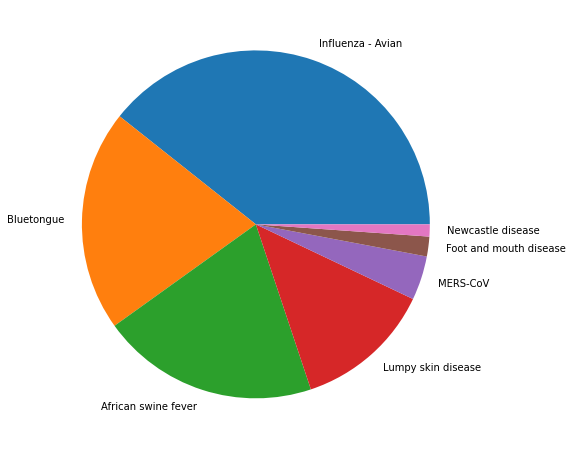

In [26]:
# Pie chart version of the above plot


fig = plt.figure(figsize = (20,8))
pieplot = plt.pie(x = top5_diseases['disease'],
       labels = list(top5_diseases.index))

plt.show()

### Observation: 

The 4 most common diseases seem much more prevalent than the others.

## Looking at which species are most affected by diseases worldwide:

In [27]:
# Looking for most common species affected by diseases

np.count_nonzero(df['speciesDescription'].unique())
top8_species = df['speciesDescription'].groupby(df['speciesDescription']).count().nlargest(8)
top8_species

speciesDescription
domestic, cattle                 4913
wild, wild boar                  2670
domestic, chicken                1682
domestic, duck                   1227
domestic, unspecified bird        808
domestic, sheep                   684
domestic, swine                   675
wild,mute swan (cygnus olor))     311
Name: speciesDescription, dtype: int64

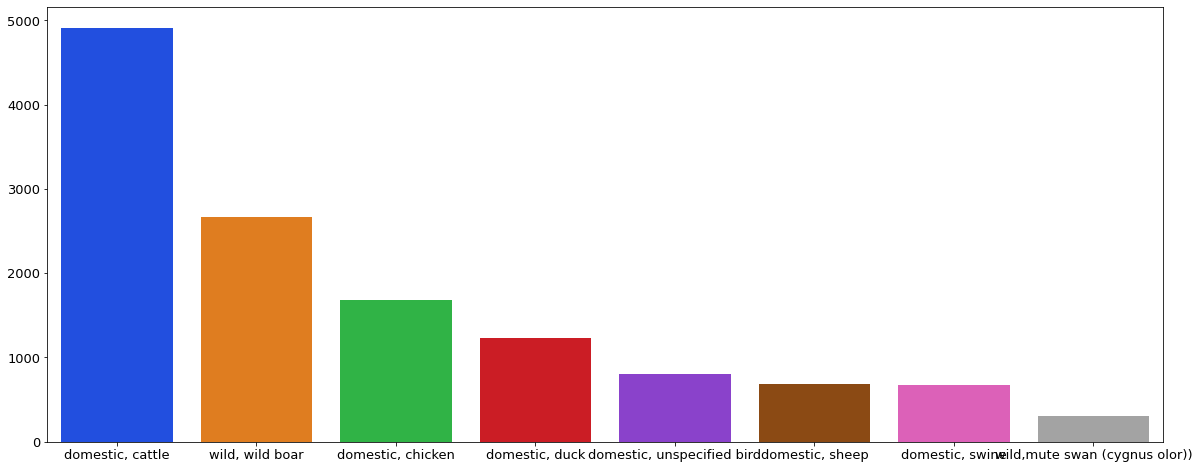

In [28]:
#Plot these species
fig = plt.figure(figsize = (20,8))
species_plot = sns.countplot(df[df['speciesDescription'].isin(top8_species.index)]['speciesDescription'],
                             order = top8_species.index,
                             palette = 'bright')
species_plot.tick_params(labelsize = 13)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

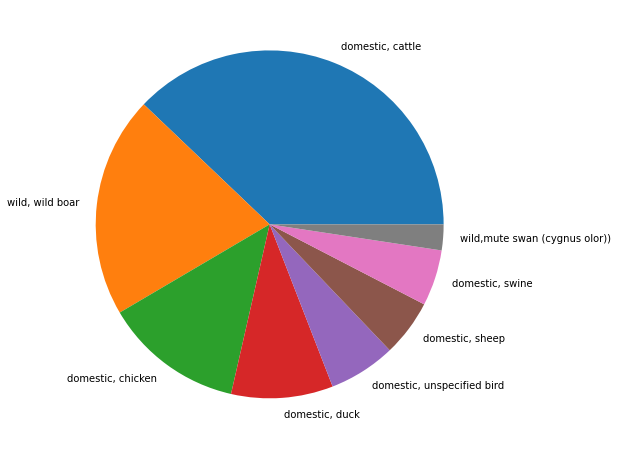

In [29]:
#Pie chart version of the above plot

plt.figure(figsize = (20,8))
pieplot = plt.pie(x = top8_species,
       labels = list(top8_species.index))
plt.show()

### Observation: 
Domestic cattle are by far the most common species with diseases. 

It is also interesting that the top 7 disease-affected species are all domestic except for wild boar, which are the second most affected species.

## Looking at the age distribution of humans affected by zoonotic diseases:

In [30]:
#Get values on age of humans affected by disease
age_info = df[df['humansAge'].notnull()][['humansAge']]

#Dropping values of age = 0
age_info_clean = age_info[age_info['humansAge'] != 0]

age_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362 entries, 83 to 16881
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   humansAge  362 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


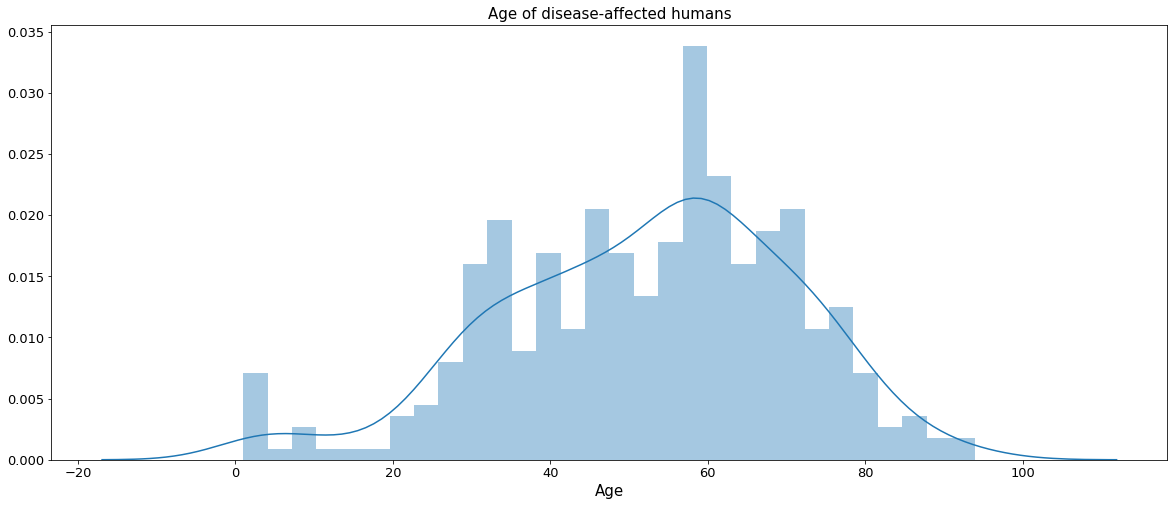

In [31]:
fig = plt.figure(figsize = (20,8))
age_plot = sns.distplot(age_info_clean, bins = 30)
age_plot.tick_params(labelsize = 13)

plt.xlabel('Age', fontdict = {'fontsize':15})
plt.title('Age of disease-affected humans', fontdict = {'fontsize':15})
plt.show()

### Observation: 
The age distribution seems relatively normal with the mean age at around 60. There is also a slight spike in cases in infants at the left end of the graph.

It seems like the very young are more susceptible to zoonotic diseases.

## Using Folium's heatmap to see which regions are most affected by diseases

In [32]:
#Creating a list of location information (Latitudes and Longitudes)

lats = df['latitude'].astype(float)
long = df['longitude'].astype(float)
locationlist = []
for i in range(0,len(lats)):
    e = [lats[i],long[i]]
    locationlist.append(e)

#Location list should be a list of lists:

locationlist[0:5]

[[-27.9, 30.8],
 [54.837037, 73.354155],
 [-21.07774, 30.21162],
 [-26.0, 28.3],
 [49.2379, 17.7002]]

In [34]:
#Importing folium and the HeatMap function

import folium
from folium.plugins import HeatMap

#Creating a map and adding the HeatMap overlay

m = folium.Map()
HeatMap(locationlist, radius = 15).add_to(m)
m

### Observations:
Zoonotic diseases appear to occur in distinct clusters especially in Africa.

America has not many cases of such diseases compared to the rest of the world.

Europe and Asia seem to be hotspots for zoonotic diseases. 


# Conclusion


The Food and Agriculture Organisation of the UN can look into better ways to gather data on how zoonotic diseases affect humans, as over 90% of the human-related variables are missing.

Avian influenza is well-known and is  the most common zoonotic disease worldwide, but other diseases like Bluetongue and Lumpy skin disease are less well-known and not far behind. It might be worthwhile to spread awareness about these diseases in affected countries.

Wild boar are surprisingly a common origin of zoonotic diseases even as most of the main contributors are domestic species.

Infants and elderly persons appear to be more vulnerable to such diseases.

# Next section: Can we predict the size of each outbreak?

The data includes a column 'sumCases', which describes the size of each outbreak occurrence globally. This notebook attempts to come up with a model to predict the sizes of future outbreaks.

### Step 1: Cleaning target variable

In [35]:
#We see some descriptive statistics about the target variable y:

df['sumCases'].describe()

# Std is 5821 compared to mean of 328, indicating an extreme right tail.

count     14535.000000
mean        328.183007
std        5821.929892
min           0.000000
25%           1.000000
50%           1.000000
75%           5.000000
max      460000.000000
Name: sumCases, dtype: float64

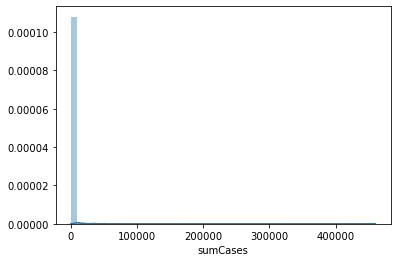

In [36]:
#Checking the distribution of target variable:

sns.distplot(df['sumCases'])

#We can see the distribution indeed has an extreme right tail

In [37]:
#Checking null values in target variable
df['sumCases'].isnull().sum()

2473

In [38]:
#Replacing with mean or median might not be suitable because of the skewed data

#Here I attempt to replace it with random observations from the same distribution instead

#Replacing null values:
cleaned_y = df['sumCases'].apply(lambda x: df['sumCases'].dropna().sample(1).values[0] if pd.isnull(x) else x)

#Checking for null values:
cleaned_y.isnull().sum()


0

In [39]:
#Replacing dataframe column with clean column:
df['sumCases'] = cleaned_y

In [40]:
#For this analysis, only outbreaks of considerable size (> 100) are considered 

#Checking the info of those cases:

morethan100 = df[df['sumCases'] > 100]
morethan100['sumCases'].describe()

#The minimum value is 402

count      1445.000000
mean       3685.349481
std       18522.723495
min         101.000000
25%         229.000000
50%         590.000000
75%        2500.000000
max      460000.000000
Name: sumCases, dtype: float64

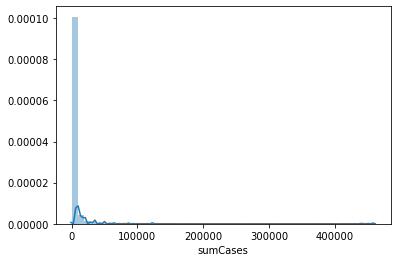

In [41]:
#Checking the shape again:

sns.distplot(morethan100['sumCases'])

#Still has a very long tail, indicating some observations with huge case numbers
#We don't want this to skew later regression models, so we remove these values



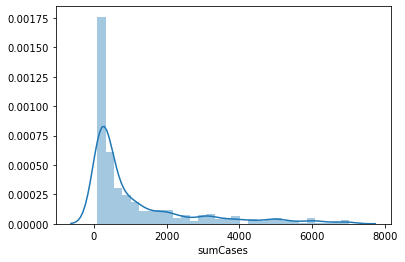

In [42]:
#Removing the largest 10 percentile of the data:

final_data = morethan100[morethan100['sumCases'] < morethan100['sumCases'].quantile(0.9)]

#Checking the shape of this data again:
sns.distplot(final_data['sumCases'])

#The tail now doesn't look as extreme

In [43]:
#Checking the description of the final data:

final_data['sumCases'].describe()

#The data still has 1284 observations, which maybe is still large enough to apply a regression model for this analysis?


count    1299.000000
mean     1211.110085
std      1551.662445
min       101.000000
25%       211.000000
50%       480.000000
75%      1500.000000
max      7000.000000
Name: sumCases, dtype: float64

### Step 2: Cleaning explanatory variables

### Variables to be included in the model:

Species: Viral loads can differ between species, and some viruses also only target certain species.

Serotype: One virus/bacteria species can have many strains which may affect it's behavior.

Country: The previous folium map has shown that outbreaks occur in clusters within different countries

Disease: Outbreaks will vary in behavior depending on the type of disease

Mention why remaining variables were not selected

#### Cleaning Species data:


In [44]:
#Checking null values in species column
final_data['speciesDescription'].isnull().sum()


135

In [45]:
#Replace with a string value
final_data['speciesDescription'] = final_data['speciesDescription'].fillna(value = 'Not Available')

#Checking again
final_data['speciesDescription'].isnull().sum()

<ipython-input-45-7a2168d069d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['speciesDescription'] = final_data['speciesDescription'].fillna(value = 'Not Available')


0

#### Cleaning Serotypes data:

Serotypes data is chosen as an explanatory variable because one virus/bacteria species can have many strains which may affect it's behavior.

In [46]:
#Replacing NaN serotypes with 'Not Available' tag:
final_data['serotypes'] = final_data['serotypes'].fillna('Not Available')

#Checking null values again:
final_data['serotypes'].isnull().sum()

<ipython-input-46-2cf593a18445>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['serotypes'] = final_data['serotypes'].fillna('Not Available')


0

### Checking if all our variables have no remaining null values:

In [47]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1299 entries, 2 to 16998
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1299 non-null   int64  
 1   source              1299 non-null   object 
 2   latitude            1299 non-null   float64
 3   longitude           1299 non-null   float64
 4   region              1299 non-null   object 
 5   country             1299 non-null   object 
 6   admin1              1299 non-null   object 
 7   localityName        1299 non-null   object 
 8   localityQuality     1299 non-null   object 
 9   observationDate     1262 non-null   object 
 10  reportingDate       1299 non-null   object 
 11  status              1299 non-null   object 
 12  disease             1299 non-null   object 
 13  serotypes           1299 non-null   object 
 14  speciesDescription  1299 non-null   object 
 15  sumAtRisk           946 non-null    float64
 16  sumCa

## Step 3: Implementing a model

Here the approach I have taken is to attempt separating the data into clusters using a clustering algorithm (unsupervised learning model). 

### K-means (or modes) clustering

K-means clustering is an algorithm that sorts data into clusters based on distance from cluster centroids.

As K-means clustering only takes numerical variables, a variant of the algorithm (K-modes clustering) is used. 
Instead of using euclidean distance to sort clusters, it uses dissimilarities (how many mismatches between two observations). 

Some documentation can be found here: https://github.com/nicodv/kmodes

I choose to include serotypes, disease, species and country as variables to do the clustering: 

In [48]:
#Defining explanatory variables and target variables


X = final_data[['speciesDescription','country','serotypes','disease']]
y = final_data['sumCases']

#For this analysis I didn't use train_test_split because it's unsupervised?

In [49]:
#Choosing number of clusters by minimising the total variation of all clusters

from kmodes.kmodes import KModes

total_variation = []

#Computing the total variation for clusters of k=1 to k =30
for i in range(1,31):
    km = KModes(n_clusters = i,
                max_iter = 100,
                ).fit(X)

    total_variation.append(km.cost_)

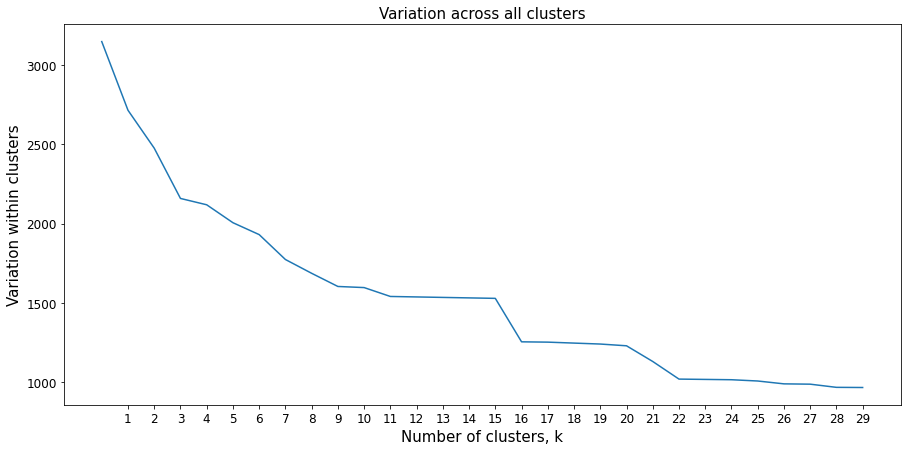

In [50]:
#Plotting the total variation against number of clusters

plt.figure(figsize = (15,7))

fig = plt.plot(total_variation)

plt.xticks(ticks = range(1,30), fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Number of clusters, k', fontdict = {'fontsize':15})
plt.ylabel('Variation within clusters', fontdict = {'fontsize':15})
plt.title('Variation across all clusters', fontdict = {'fontsize':15} )

plt.show()

In [51]:
#Fitting the model
km = KModes(n_clusters = 6,
                max_iter = 100,
                ).fit(X)

In [52]:
#Using the model to assign each row to a cluster
clusters = km.predict(X)

#Creating new column for cluster variable

final_data['cluster'] = clusters.astype(str)

<ipython-input-52-7bbbf3a7a6ca>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['cluster'] = clusters.astype(str)


In [53]:
#Checking what our data looks like with clusters

final_data[list(X.columns) + ['sumCases','cluster']].sample(10)

speciesDescription                     country      serotypes  \
9599     domestic, swine          Russian Federation  Not Available   
4995       Not Available                       China      H7N9 LPAI   
2229      domestic, duck                       China      H5N6 HPAI   
14908  domestic, chicken                     Nigeria      H5N1 HPAI   
15693  domestic, chicken                     Nigeria      H5N1 HPAI   
9014    domestic, cattle                    Zimbabwe           SAT2   
16268      Not Available                Saudi Arabia  Not Available   
16667  domestic, chicken                     Nigeria      H5N1 HPAI   
2674   domestic, chicken  Taiwan (Province of China)      H5N2 HPAI   
1644    domestic, turkey                     Germany      H5N8 HPAI   

                      disease  sumCases cluster  
9599      African swine fever     311.0       0  
4995        Influenza - Avian     496.0       3  
2229        Influenza - Avian     134.0       3  
14908       Influenza - Avian     140.0       0  
15693       Influenza - Avian    1000.0       0  
9014   Foot and mouth disease     355.0       0  
16268               MERS-CoV     1278.0       3  
16667       Influenza - Avian     350.0       0  
2674        Influenza - Avian     383.0       2  
1644        Influenza - Avian    6000.0       1

Break variables into components if possible, eg. domestic and species

Also eg. breaking serotypes into two? 

## Step 4: Checking if the clusters are related to the target variable

Text(0, 0.5, 'Outbreak Size')

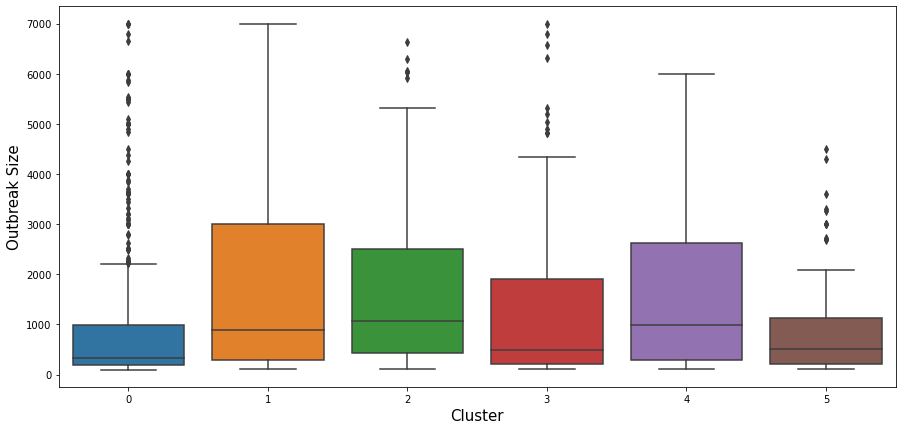

In [54]:
plt.figure(figsize = (15,7))

sns.boxplot(x = 'cluster',
            y = 'sumCases',
            data = final_data)

plt.xlabel(xlabel = 'Cluster', fontdict = {'fontsize':15})
plt.ylabel(ylabel = 'Outbreak Size', fontdict = {'fontsize':15})

### Observation:
There doesn't seem to be any correlation between clusters and outbreak size.

### Trying the same box plot but with a Box-Cox transformation of outbreak size:

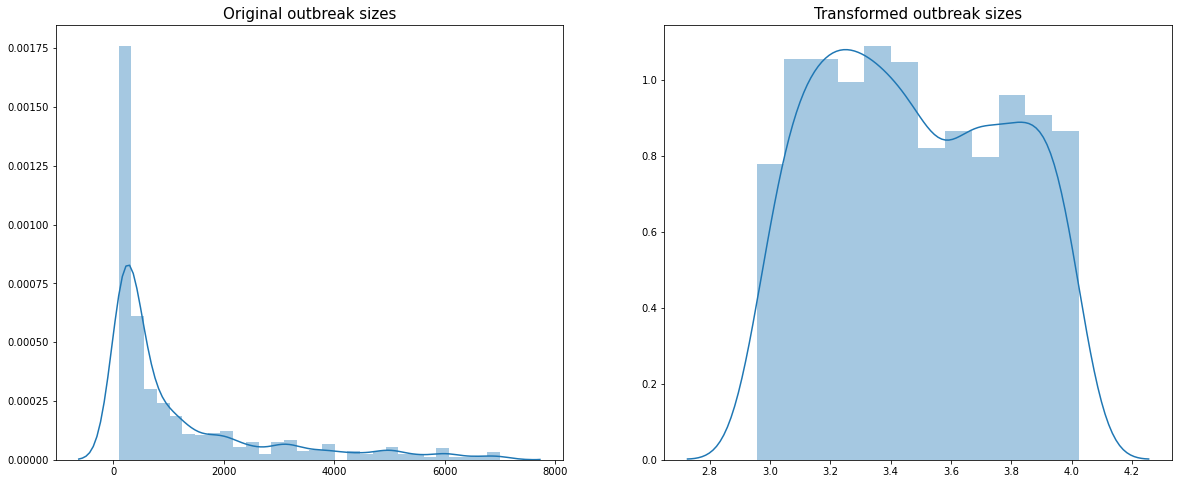

In [55]:
import scipy
from scipy import stats
transformed = stats.boxcox(final_data['sumCases'])[0]

#Plotting graphs to compare the transformed and original data

fig, ax =plt.subplots(1,2, figsize = (20,8))

sns.distplot(transformed, ax = ax[1])
sns.distplot(final_data['sumCases'], ax = ax[0])


ax[0].set_title('Original outbreak sizes', fontsize = 15)
ax[1].set_title('Transformed outbreak sizes', fontdict = {'fontsize':15})
ax[0].set_xlabel(None)

plt.show()

In [56]:
final_data['Box-Cox sumCases'] = transformed 

<ipython-input-56-7b70ee2d6fc3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['Box-Cox sumCases'] = transformed


In [57]:
final_data.groupby('cluster').count()['Id']

cluster
0    636
1    258
2    123
3    154
4     40
5     88
Name: Id, dtype: int64

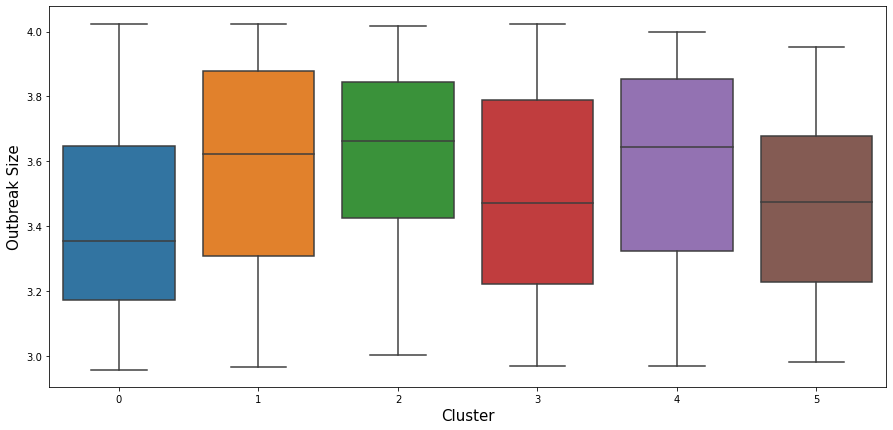

In [58]:
plt.figure(figsize = (15,7))

sns.boxplot(x = 'cluster',
            y = 'Box-Cox sumCases',
            data = final_data)

plt.xlabel(xlabel = 'Cluster', fontdict = {'fontsize':15})
plt.ylabel(ylabel = 'Outbreak Size', fontdict = {'fontsize':15})

plt.show()

### Observation:
There still doesn't seem to be any correlation between clusters and outbreak size. 

# Ending notes to consider:

Why are some regions so void of data? Are there no cases in regions like Australia/New Zealand, or is there just no data collection happening there?

Why are so many human-related variables missing? Are they missing data, or are they indicative of zeroes?

